In [ ]:
%matplotlib inline

<div class="document" id="random-walker-segmentation">
<h1 class="title">Random walker segmentation</h1>
<p>The random walker algorithm <a class="footnote-reference" href="#id2" id="id1">[1]</a>  determines the segmentation of an image from
a set of markers labeling several phases (2 or more). An anisotropic diffusion
equation is solved with tracers initiated at the markers' position. The local
diffusivity coefficient is greater if neighboring pixels have similar values,
so that diffusion is difficult across high gradients. The label of each unknown
pixel is attributed to the label of the known marker that has the highest
probability to be reached first during this diffusion process.</p>
<p>In this example, two phases are clearly visible, but the data are too
noisy to perform the segmentation from the histogram only. We determine
markers of the two phases from the extreme tails of the histogram of gray
values, and use the random walker for the segmentation.</p>
<table class="docutils footnote" frame="void" id="id2" rules="none">
<colgroup><col class="label" /><col /></colgroup>
<tbody valign="top">
<tr><td class="label"><a class="fn-backref" href="#id1">[1]</a></td><td><em>Random walks for image segmentation</em>, Leo Grady, IEEE Trans. Pattern
Anal. Mach. Intell. 2006 Nov; 28(11):1768-83</td></tr>
</tbody>
</table>
</div>


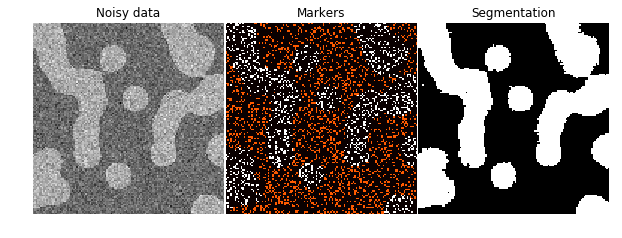

In [1]:
import numpy as np
from scipy import ndimage
from scipy.misc import imsave
import matplotlib.pyplot as plt

from skimage.segmentation import random_walker


def microstructure(l=256):
    """
    Synthetic binary data: binary microstructure with blobs.

    Parameters
    ----------

    l: int, optional
        linear size of the returned image
    """
    n = 5
    x, y = np.ogrid[0:l, 0:l]
    mask = np.zeros((l, l))
    generator = np.random.RandomState(1)
    points = l * generator.rand(2, n ** 2)
    mask[(points[0]).astype(np.int), (points[1]).astype(np.int)] = 1
    mask = ndimage.gaussian_filter(mask, sigma=l / (4. * n))
    return (mask > mask.mean()).astype(np.float)


# Generate noisy synthetic data
data = microstructure(l=128)
data += 0.35 * np.random.randn(*data.shape)
markers = np.zeros(data.shape, dtype=np.uint)
markers[data < -0.3] = 1
markers[data > 1.3] = 2

#markers[10:15,5:10] = 1
#markers[35:40,20:25] = 1
#markers[70:80,30:35] = 1
#markers[10:15,60:65] = 2
#markers[100:110,90:95] = 2

# Run random walker algorithm
labels = random_walker(data, markers, beta=90, mode='bf')

# Plot results
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(8, 3.2))
#imsave('noisy.png',data)
ax1.imshow(data, cmap='gray', interpolation='nearest')
#plt.savefig('noisy.png')
ax1.axis('off')
ax1.set_title('Noisy data')
ax2.imshow(markers, cmap='hot', interpolation='nearest')
ax2.axis('off')
ax2.set_title('Markers')
ax3.imshow(labels, cmap='gray', interpolation='nearest')
ax3.axis('off')
ax3.set_title('Segmentation')

fig.subplots_adjust(hspace=0.01, wspace=0.01, top=1, bottom=0, left=0,
                    right=1)
plt.show()

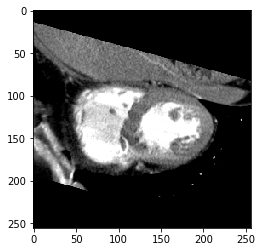

In [5]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

fname = 'axial_CT_slice.bmp'
image = Image.open(fname).convert("L")
arr = np.asarray(image)
plt.imshow(arr, cmap='gray')
plt.show()

In [6]:
arr

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ..., 
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [36]:
arr[150,100]

214

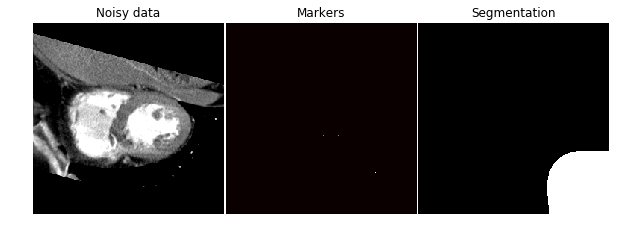

In [4]:
import numpy as np
from scipy import ndimage
from scipy.misc import imsave
import matplotlib.pyplot as plt
#import matplotlib.image as mpimg
from scipy.misc import imread

from skimage.segmentation import random_walker
import skimage as skimage

# Generate noisy synthetic data

#data = mpimg.imread('axial_CT_slice.bmp')
data = skimage.img_as_float(imread('axial_CT_slice.bmp'))
markers = np.zeros(data.shape, dtype=np.uint)
markers[150,130] = 1
markers[150,150] = 1
#markers[150,80] = 1
markers[200,200] = 2
#markers[90,150] = 3

# Run random walker algorithm
labels = random_walker(data, markers, beta=90, mode='bf')

# Plot results
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(8, 3.2))
#imsave('noisy.png',data)
ax1.imshow(data, cmap='gray', interpolation='nearest')
#plt.savefig('noisy.png')
ax1.axis('off')
ax1.set_title('Noisy data')
ax2.imshow(markers, cmap='hot', interpolation='nearest')
ax2.axis('off')
ax2.set_title('Markers')
ax3.imshow(labels, cmap='gray', interpolation='nearest')
ax3.axis('off')
ax3.set_title('Segmentation')

fig.subplots_adjust(hspace=0.01, wspace=0.01, top=1, bottom=0, left=0,
                    right=1)
plt.show()

In [20]:
import numpy as np
csv = np.genfromtxt ('mask.csv', delimiter=",")
imshow(csv, cmap='gray')

NameError: name 'imshow' is not defined

In [26]:
labels

array([[1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       ..., 
       [1, 1, 1, ..., 2, 2, 2],
       [1, 1, 1, ..., 2, 2, 2],
       [1, 1, 1, ..., 2, 2, 2]], dtype=int32)